In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df_we = pd.read_csv('final_df.csv')
df_e = pd.read_csv('final_encoded.csv')

In [6]:
df_we

,district,area,price,rooms,metro_time,info_total_area,rent_jkh,rent_prepayment,rent_term,rent_living_conditions,floor_ratio,last_floor,year_built_interval
0,ЦАО,р-н Пресненский,470000,2,7.0,73.0,включена (счётчики включены),1 месяц,от года,можно с детьми,0.683333,0,1991-2025
1,ЦАО,р-н Пресненский,270000,3,13.0,68.0,включена (без счётчиков),1 месяц,от года,можно с детьми,0.522727,0,1991-2025
2,СЗАО,р-н Митино,30000,1,9.0,40.0,включена (счётчики включены),1 месяц,от года,"ни с детьми, ни с животными",0.333333,0,1991-2025
3,ЮАО,р-н Донской,75000,2,13.0,60.0,включена (без счётчиков),1 месяц,от года,"ни с детьми, ни с животными",0.375000,0,1945-1970
4,САО,р-н Беговой,29000,студия,7.0,12.0,включена (счётчики включены),1 месяц,от года,"ни с детьми, ни с животными",0.611111,0,1991-2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,ЮВАО,р-н Южнопортовый,65000,студия,5.0,27.0,включена (без счётчиков),1 месяц,от года,"ни с детьми, ни с животными",0.133333,0,1991-2025
1386,САО,р-н Дмитровский,65000,1,24.0,35.7,включена (без счётчиков),1 месяц,от года,"ни с детьми, ни с животными",0.636364,0,1991-2025
1387,СЗАО,р-н Северное Тушино,65000,1,6.0,40.0,включена (без счётчиков),1 месяц,от года,можно с детьми,0.636364,0,1991-2025
1388,ЗАО,р-н Очаково-Матвеевское,64000,студия,7.0,22.0,включена (без счётчиков),1 месяц,от года,"ни с детьми, ни с животными",0.333333,0,1991-2025


In [8]:
desc = df_we[['price', 'metro_time', 'info_total_area', 'floor_ratio']].describe()

In [9]:
selected_columns = ['price', 'metro_time', 'info_total_area', 'floor_ratio']

desc = df_we[selected_columns].describe()

median = df_we[selected_columns].median().to_frame().T
median.index = ['median']

mode = df_we[selected_columns].mode().iloc[0].to_frame().T
mode.index = ['mode']

iqr = (desc.loc['75%'] - desc.loc['25%']).to_frame().T
iqr.index = ['IQR']

desc_full = pd.concat([desc, median, mode, iqr])

desc_full = desc_full.T

print(desc_full)

                  count          mean           std           min  \
price            1390.0  68962.690647  46271.297555  20000.000000   
metro_time       1390.0      8.186331      4.513857      1.000000   
info_total_area  1390.0     39.791928     17.160327     11.000000   
floor_ratio      1390.0      0.538933      0.282382      0.041667   

                          25%           50%           75%       max  \
price            50000.000000  60000.000000  68000.000000  750000.0   
metro_time           5.000000      7.000000     11.000000      25.0   
info_total_area     30.000000     38.000000     45.000000     222.0   
floor_ratio          0.292279      0.529412      0.777778       1.0   

                       median     mode           IQR  
price            60000.000000  65000.0  18000.000000  
metro_time           7.000000      6.0      6.000000  
info_total_area     38.000000     40.0     15.000000  
floor_ratio          0.529412      1.0      0.485498  


<Axes: >

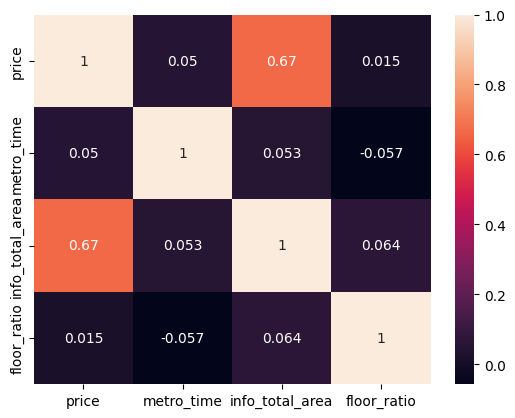

In [11]:
sns.heatmap(df_we[['price', 'metro_time', 'info_total_area','floor_ratio']].corr(), annot=True)

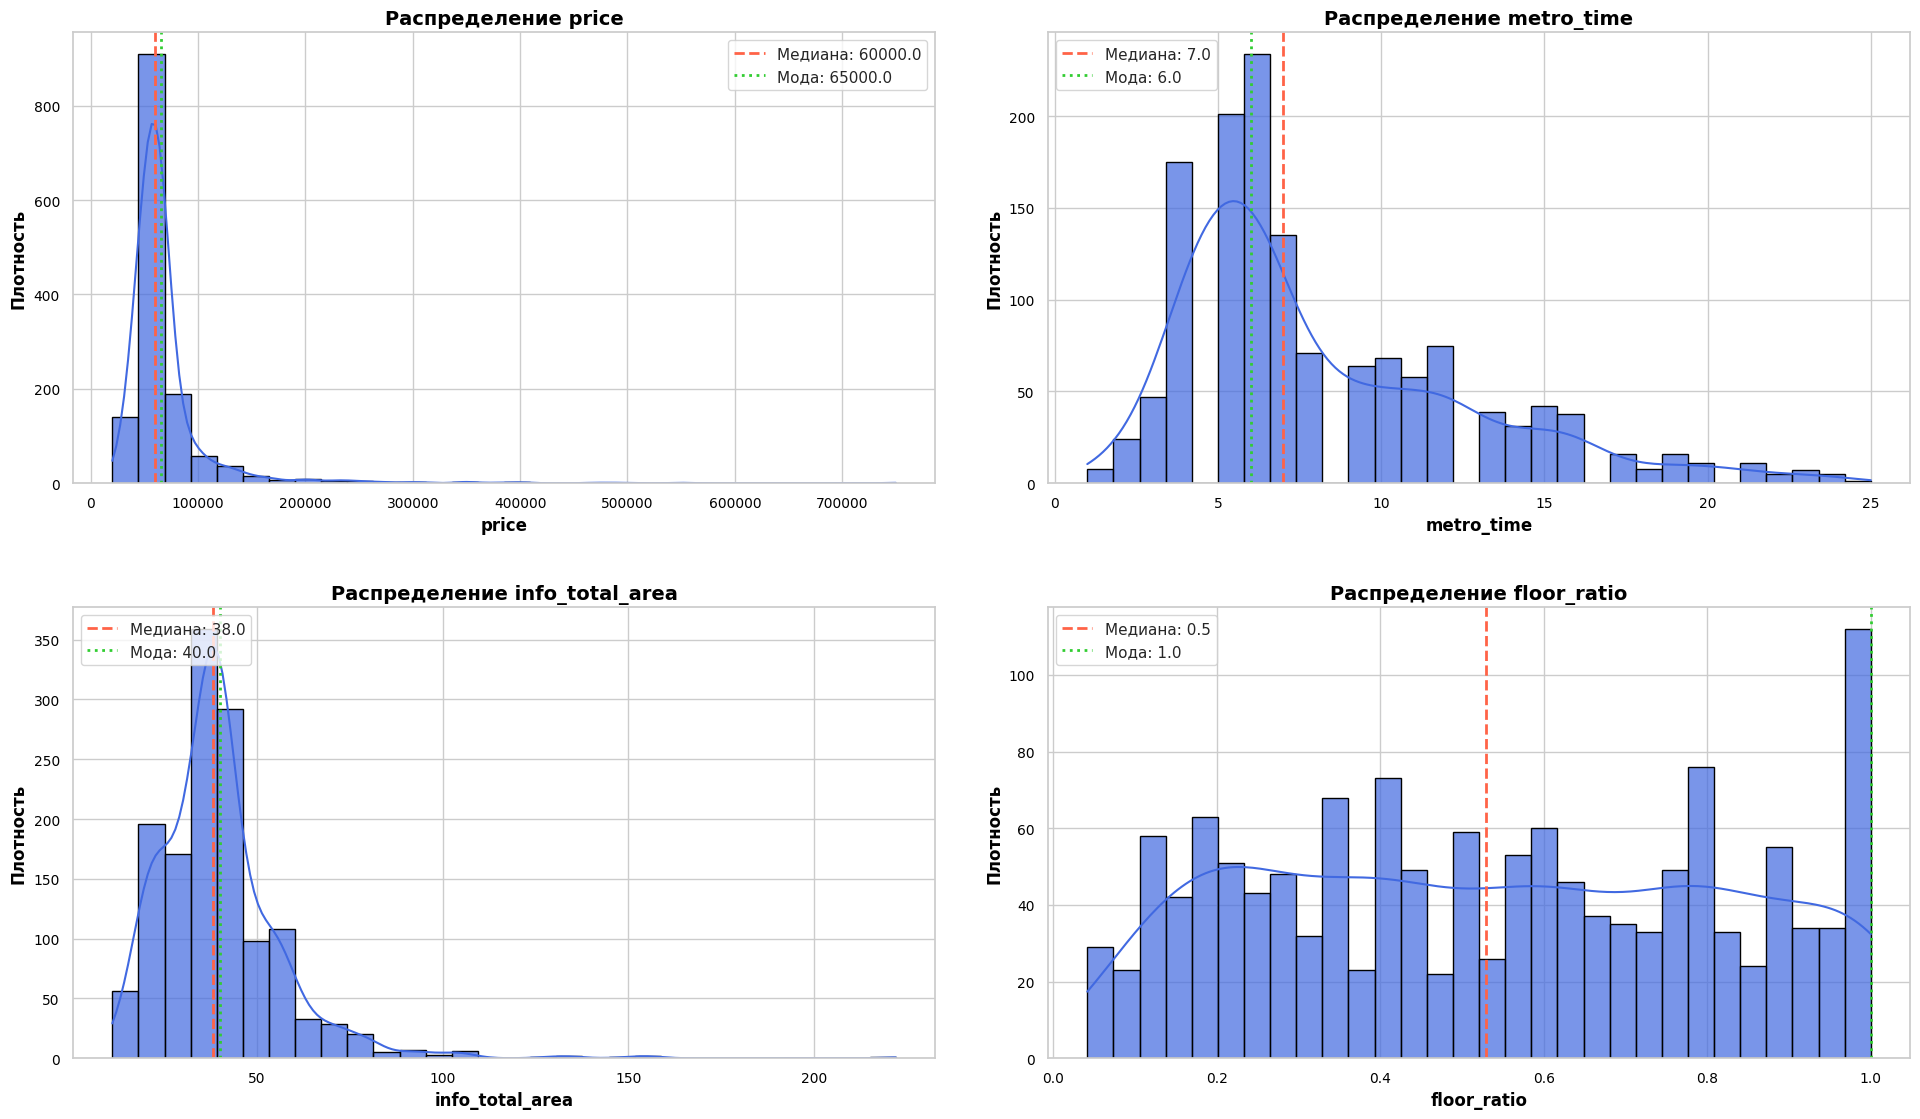

In [15]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(20, 12))  # Увеличим высоту для лучшего отображения

columns = ['price', 'metro_time', 'info_total_area', 'floor_ratio']

# Преобразуем двумерный массив осей в плоский (для удобства)
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.histplot(
        data=df_we[col],
        bins=30,
        kde=True,
        color='royalblue',
        alpha=0.7,
        ax=axes[i],  # Используем плоский массив осей
        edgecolor='black'
    )

    median = df_we[col].median()
    mode = df_we[col].mode()[0]
    axes[i].axvline(median, color='tomato', linestyle='--', linewidth=2, label=f'Медиана: {median:.1f}')
    axes[i].axvline(mode, color='limegreen', linestyle=':', linewidth=2, label=f'Мода: {mode:.1f}')

    axes[i].set_title(f'Распределение {col}', fontsize=14, fontweight='bold', color='black')
    axes[i].set_xlabel(col, fontsize=12, fontweight='bold', color='black')
    axes[i].set_ylabel('Плотность', fontsize=12, fontweight='bold', color='black')
    axes[i].legend(loc='upper right' if col == 'price' else 'upper left')

    # Форматирование чисел для price (убираем экспоненту)
    if col == 'price':
        axes[i].ticklabel_format(axis='x', style='plain', scilimits=(0,0))

    axes[i].tick_params(axis='x', labelsize=10, labelcolor='black', labelrotation=0)
    axes[i].tick_params(axis='y', labelsize=10, labelcolor='black')

plt.tight_layout(pad=3.0)
plt.show()

In [17]:
def calculate_stats(df, columns):
    results = []
    for col in columns:
        data = df_we[col].dropna()
        n = len(data)
        mean = data.mean()
        std = data.std(ddof=0)  # Смещенное стандартное отклонение (N в знаменателе)

        # Коэффициент асимметрии (A)
        skew = np.mean(((data - mean) / std)**3)

        # Эксцесс (E)
        kurtosis = np.mean(((data - mean) / std)**4) - 3

        results.append({
            'Переменная': col,
            'Асимметрия (A)': round(skew, 4),
            'Эксцесс (E)': round(kurtosis, 4),
            'Наблюдения': n
        })

    return pd.DataFrame(results)

stats_df_we = calculate_stats(df_we, ['price', 'metro_time', 'info_total_area', 'floor_ratio'])
stats_df_we.set_index('Переменная', inplace=True)

print(stats_df_we.to_markdown(tablefmt="grid"))

+-----------------+------------------+---------------+--------------+
| Переменная      |   Асимметрия (A) |   Эксцесс (E) |   Наблюдения |
+=================+==================+===============+==============+
| price           |           6.3904 |       60.4503 |         1390 |
+-----------------+------------------+---------------+--------------+
| metro_time      |           1.1826 |        0.9767 |         1390 |
+-----------------+------------------+---------------+--------------+
| info_total_area |           2.4783 |       15.1203 |         1390 |
+-----------------+------------------+---------------+--------------+
| floor_ratio     |           0.0593 |       -1.2088 |         1390 |
+-----------------+------------------+---------------+--------------+


In [ ]:
df = df_we

In [ ]:
df_we['rent_living_conditions'] = df_we['rent_living_conditions'].replace(
    {'ни с детьми, ни с животными': 'ни с кем'}
)

<ipython-input-70-082b54849cc5>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold', color='black', fontsize=8 if var == 'info_floor' else 10)
<ipython-input-70-082b54849cc5>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold', color='black', fontsize=8 if var == 'info_floor' else 10)
<ipython-input-70-082b54849cc5>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold', color='black', fontsize=8 if var == 'info_floor' else 10)
<ipython-input-70-082b54849cc5>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using 

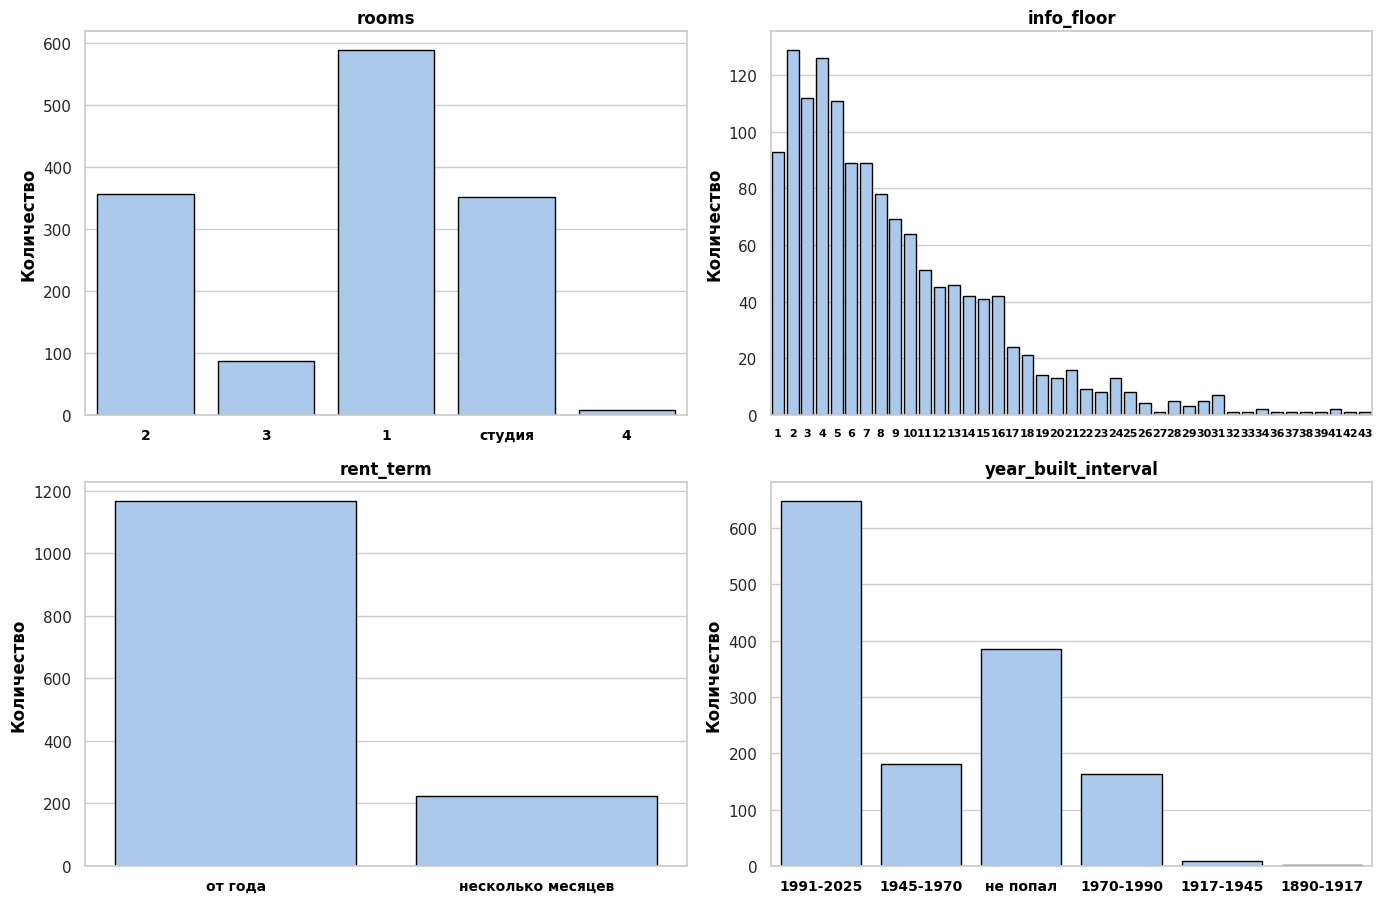

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ordinal_vars = ['rooms', 'info_floor', 'rent_term', 'year_built_interval']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, var in zip(axes.flatten(), ordinal_vars):
    bars = sns.countplot(x=df_we[var], ax=ax, edgecolor='black')
    ax.set_title(var, fontweight='bold', color='black')
    ax.set_xlabel('')
    ax.set_ylabel('Количество', fontweight='bold', color='black')

    ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold', color='black', fontsize=8 if var == 'info_floor' else 10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


<ipython-input-71-cb22e2525547>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=80, fontsize=8, fontweight='bold', color='black')
<ipython-input-71-cb22e2525547>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold', color='black')
<ipython-input-71-cb22e2525547>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold', color='black')
<ipython-input-71-cb22e2525547>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha='right', fontsize=10, fontwei

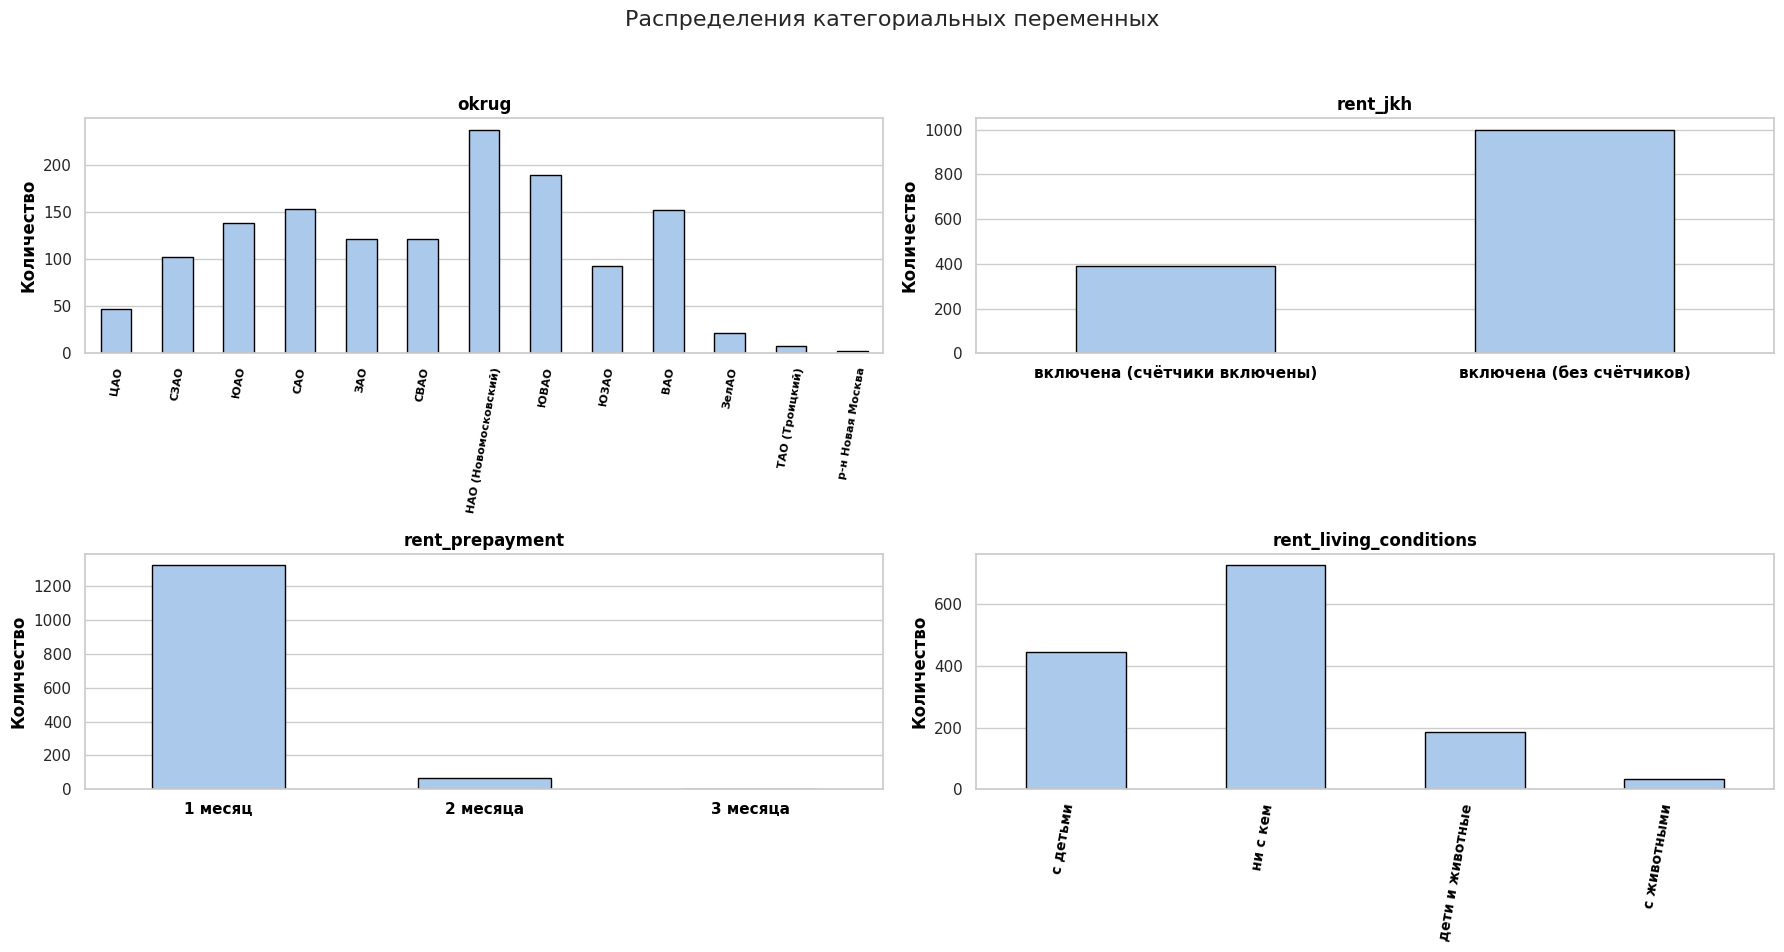

In [ ]:
df_we['rent_living_conditions'] = df_we['rent_living_conditions'].replace(
    {'ни с детьми ни с животными': 'ни с кем'}
)

categorical_vars = ['okrug', 'rent_jkh', 'rent_prepayment', 'rent_living_conditions']

fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Распределения категориальных переменных', fontsize=16)

axes = axes.flatten()

for ax, var in zip(axes, categorical_vars):
    bar_width = 0.8 if var == 'raion' else 0.5
    bars = sns.countplot(x=df_we[var], ax=ax, width=bar_width, edgecolor='black')

    title = 'district' if var == 'raion' else var
    ax.set_title(title, fontweight='bold', color='black')
    ax.set_xlabel('')
    ax.set_ylabel('Количество', fontweight='bold', color='black')

    if var == 'raion':
        ax.set_xticklabels([])

    elif var == 'okrug':
        ax.set_xticklabels(ax.get_xticklabels(), rotation=80, fontsize=8, fontweight='bold', color='black')

    elif var == 'rent_living_conditions':
        ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha='right', fontsize=10, fontweight='bold', color='black')
        ax.margins(x=0.3)
        ax.set_xlim(-0.5, len(df_we[var].unique()) - 0.5)

    else:
        ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold', color='black')

for j in range(len(categorical_vars), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
